In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
df = pd.DataFrame(data = titanic)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='sex', ylabel='age'>

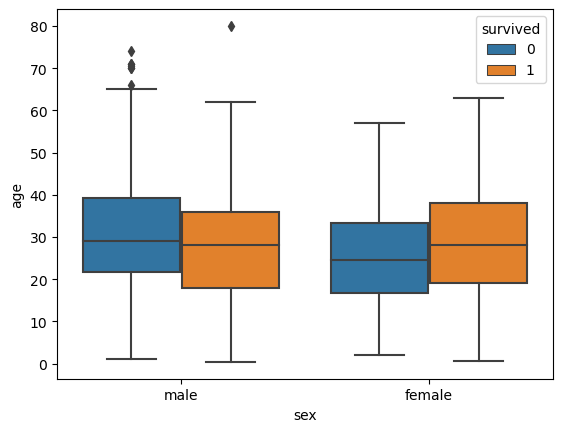

In [9]:
sns.boxplot(data = df , x = 'sex' , y = 'age' , hue = 'survived')

<Axes: xlabel='sex', ylabel='age'>

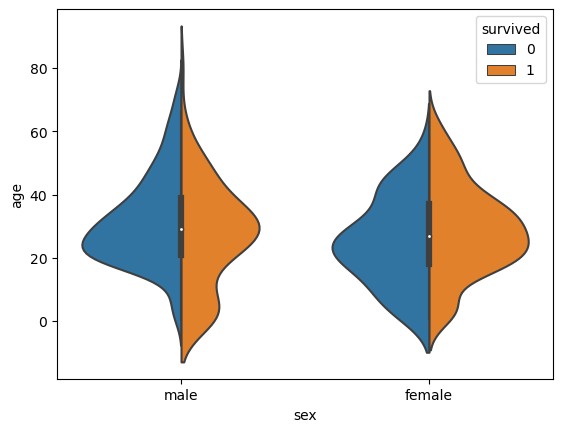

In [10]:
sns.violinplot(data=df, x='sex', y='age', hue='survived', split=True)


In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
df['age'] = df['age'].fillna(df['age'].mean())

In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
df['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
df = df.drop('deck' , axis = 1)

In [17]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

<Axes: xlabel='sex', ylabel='age'>

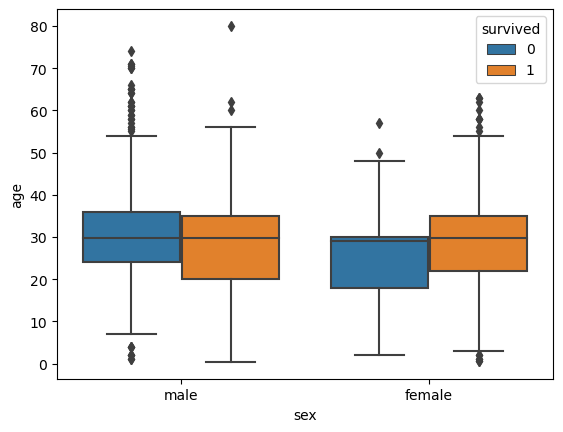

In [23]:
sns.boxplot(data = df , x = 'sex' , y = 'age' , hue = 'survived')

<Axes: >

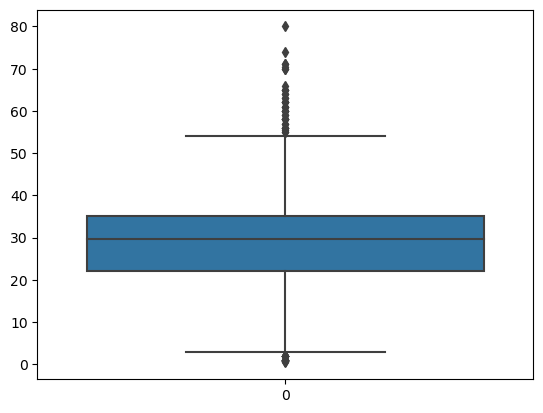

In [25]:
sns.boxplot(df['age'])

In [26]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75) 

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

In [29]:
outliers  = df[(df['age'] < lower_bound ) | (df['age'] > upper_bound)]
print(outliers['age'])

7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: age, Length: 66, dtype: float64


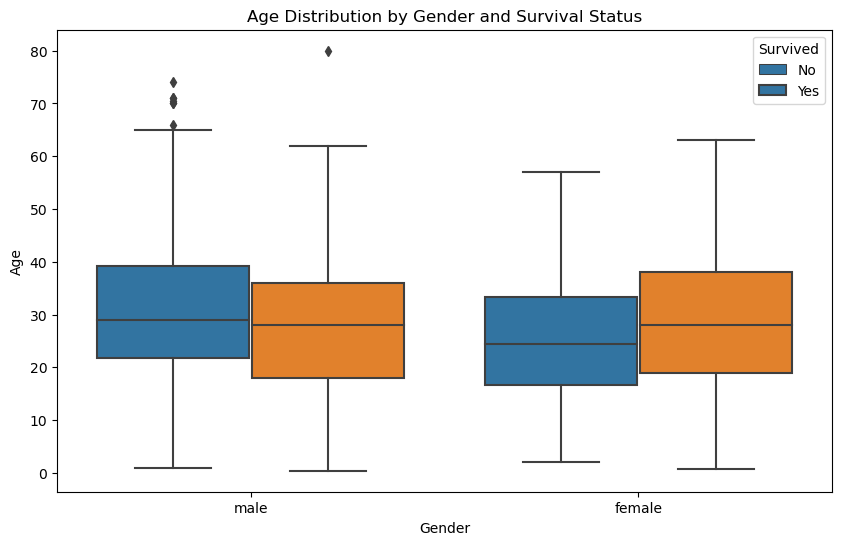

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=titanic)
plt.title('Age Distribution by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [22]:
#sns.boxplot(data = df , x = 'sex' , y = 'age' , hue = 'survived'  , showfliers = False)